In [1]:
"""
In this notebook we examine more closely the structure of the citation graph.
Specifically, we will look at the distributions of court type, jurisdiction, and decision year
in the largest connected component.
Moreover, we will look at how many opinions there are per case in this large connected component.
"""

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

G = nx.read_gpickle('../citation_graph.gpickle')
big_subgraph = nx.subgraph(G, list(nx.connected_components(G))[0])
G = None
nodes = list(big_subgraph.nodes)
big_subgraph = None

In [11]:
# Need to use full dataset (with opinions) to address the opinions/case question.
op_per_case_data = pd.read_csv('../data_uncompressed/citation_graph_full_data.csv',
                              usecols=['case_id'])
op_per_case_data.shape

(196584, 1)

In [12]:
op_per_case_data = op_per_case_data[op_per_case_data.case_id.isin(nodes)]

243891     8
1895782    8
3559180    7
1578246    7
1449586    7
Name: case_id, dtype: int64

In [13]:
op_per_case_data.shape

(195491, 1)

In [8]:
len(nodes)

176483

In [18]:
op_per_case_data.case_id.unique().shape

(176456,)

In [20]:
# NOTE: THE FOLLOWING CASES DO NOT HAVE ANY OPINIONS ASSOCIATED TO THEM!
# This means that these cases were cited by other cases in the corpus, although they do not
# themselves have any opinions in the corpus.
set(nodes) - set(op_per_case_data.case_id.to_list())

{425837,
 1309526,
 1314472,
 1555015,
 1652916,
 1700081,
 1727597,
 1907420,
 2578560,
 2588008,
 2904954,
 5784751,
 5785101,
 5785354,
 5785778,
 5785986,
 5786114,
 5786383,
 5786429,
 5786494,
 5786701,
 5787311,
 5788137,
 5789923,
 5789961,
 5790406,
 8728354}

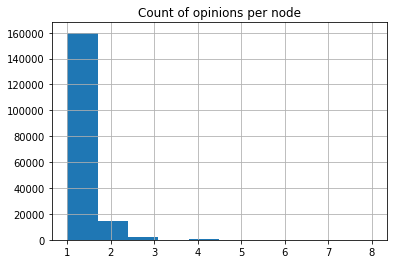

In [24]:
fig, ax = plt.subplots()
op_per_case_data.case_id.value_counts().hist(ax=ax)
ax.set_title('Count of opinions per node')
plt.show()

In [29]:
op_per_case_data = None
data = pd.read_csv('../data_uncompressed/citation_graph_data_no_ops.csv')

data = data[data.case_id.isin(nodes)]
data.shape

(176483, 4)

In [40]:
# Get jurisdiction value counts
data.jurisdiction.value_counts()

Illinois      105675
Arkansas       53934
New Mexico     16874
Name: jurisdiction, dtype: int64

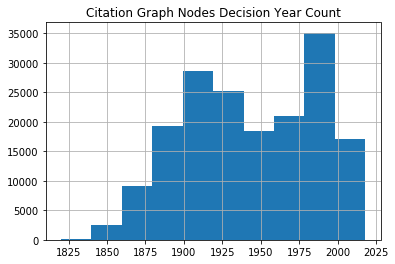

In [42]:
# View histogram of year

fig, ax = plt.subplots()
data.decision_year.hist(ax=ax)
ax.set_title('Citation Graph Nodes Decision Year Count')
plt.show()

# Several cases are pre-1950. 

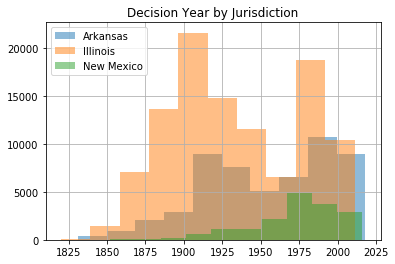

In [43]:
# Decision year by jurisdiction

groups = data.groupby('jurisdiction').decision_year

fig, ax = plt.subplots()

for k, v in groups:
    v.hist(label=k, alpha=.50, ax=ax)

ax.legend()
ax.set_title('Decision Year by Jurisdiction')

plt.show()

In [44]:
# Court type value counts.

data.court.value_counts()

Illinois Appellate Court                       62157
Arkansas Supreme Court                         45583
Illinois Supreme Court                         41111
Supreme Court of New Mexico                    10033
Arkansas Court of Appeals                       8348
Court of Appeals of New Mexico                  6841
Illinois Court of Claims                        2294
Illinois Circuit Court                           113
Superior Court of the Territory of Arkansas        2
Arkansas Circuit Court                             1
Name: court, dtype: int64